In [17]:
import sys
import numpy as np
import pandas as pd
import seaborn as sb

In [18]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
url = "https://itakigawa.github.io/data/hsi2020/data_impurities.csv"
mytable = pd.read_csv(url,index_col=0)

In [19]:
import matplotlib.pyplot as plt

for x in mytable.index:
  for y in mytable.columns:
    #print(f' host is {x} and guest is {y} with value {mytable.loc[x,y]}')
    if x != y:
      mytable.loc[x,y] += mytable.loc[x,x]
mytable

,Fe,Co,Ni,Cu,Ru,Rh,Pd,Ag,Ir,Pt,Au
Fe,-0.92,-0.87,-1.12,-1.05,-1.21,-1.46,-2.16,-1.75,-1.28,-2.01,-2.34
Co,-1.16,-1.17,-1.45,-1.33,-1.41,-1.75,-2.54,-2.08,-1.53,-2.36,-2.73
Ni,-1.20,-1.10,-1.29,-1.10,-1.43,-1.60,-2.26,-1.82,-1.43,-2.09,-2.42
Cu,-2.11,-2.07,-2.40,-2.67,-2.09,-2.35,-3.31,-3.37,-2.09,-3.00,-3.76
Ru,-1.20,-1.15,-1.40,-1.29,-1.41,-1.58,-2.23,-1.68,-1.39,-2.03,-2.25
Rh,-1.49,-1.39,-1.57,-1.29,-1.69,-1.73,-2.27,-1.66,-1.56,-2.08,-2.22
Pd,-1.46,-1.29,-1.33,-0.89,-1.59,-1.47,-1.83,-1.24,-1.30,-1.64,-1.66
Ag,-3.58,-3.46,-3.63,-3.83,-3.46,-3.44,-4.16,-4.30,-3.16,-3.80,-4.45
Ir,-1.90,-1.84,-2.06,-1.90,-2.02,-2.26,-2.84,-2.24,-2.11,-2.67,-2.85
Pt,-1.92,-1.77,-1.85,-1.53,-2.11,-2.02,-2.42,-1.81,-1.87,-2.25,-2.30


In [20]:
url2 = "https://itakigawa.github.io/data/hsi2020/features9.csv"
features = pd.read_csv(url2, index_col=0)
features

,name,Num of d-electrons,Bulk wigner-seitz radius,atomic number,atomic mass,period,electronegativity,Iionization energy(eV),_fusH,rho25
symbol,,,,,,,,,,
Fe,Iron,8,2.66,26,55.84500,4,1.83,7.9024,247.3,7.87
Co,Cobalt,9,2.62,27,58.93320,4,1.88,7.8810,272.5,8.86
Ni,Nickel,10,2.60,28,58.69340,4,1.91,7.6398,290.3,8.90
Cu,Copper,11,2.67,29,63.54600,4,1.90,7.7264,203.5,8.96
Ru,Ruthenium,8,2.79,44,101.07000,5,2.20,7.3605,381.8,12.10
Rh,Rhodium,9,2.81,45,102.90550,5,2.28,7.4589,258.4,12.40
Pd,Palladium,10,2.87,46,106.42000,5,2.20,8.3369,157.3,12.00
Ag,Silver,11,3.01,47,107.86820,5,1.93,7.5762,104.6,10.50
Ir,Iridium,9,2.84,77,192.21700,6,2.20,8.9670,213.9,22.50


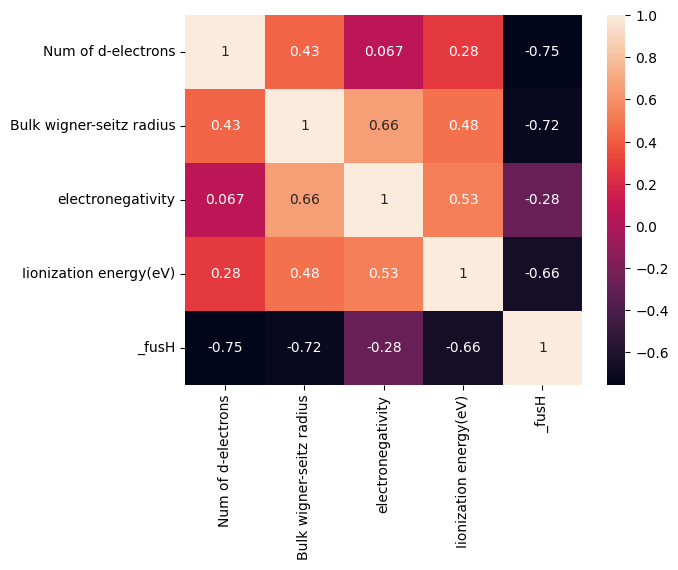

In [21]:
url2 = "https://itakigawa.github.io/data/hsi2020/features9.csv"
features_hmap = pd.read_csv(url2, index_col=0)
features_hmap.drop(['period', 'name', 'atomic number', 'rho25', 'atomic mass'] , axis='columns', inplace=True)
features_hmap
dataplot = sb.heatmap(features_hmap.corr(), annot = True)
plt.show()

host is Fe and guest is Cu, the input is [  8.       2.66    26.      55.845    4.       1.83     7.9024 247.3
   7.87    11.       2.67    29.      63.546    4.       1.9      7.7264
 203.5      8.96  ] and output is -1.05


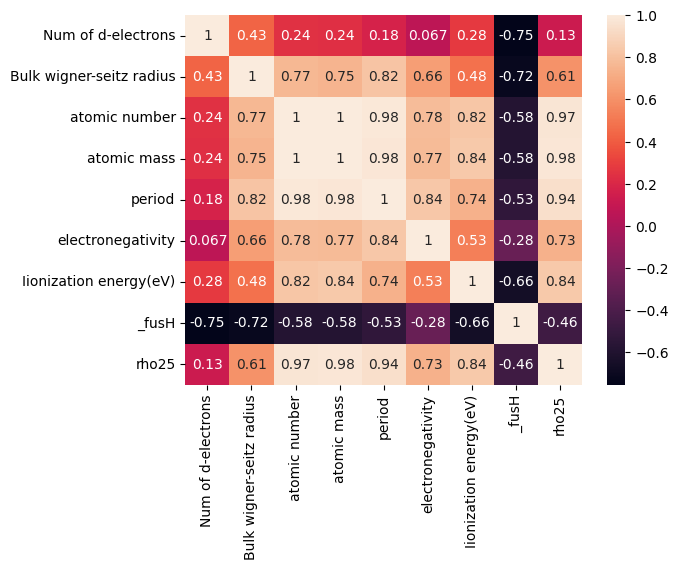

In [22]:
features.drop('name', axis='columns', inplace=True)
#name column nai chiyea so drop kar dia
X = list()
y = list()

for x in mytable.index:
  for k in mytable.columns:
    vec_x = features.loc[x].to_numpy()
    vec_k = features.loc[k].to_numpy()
    #input we are giving
    x_val = np.concatenate((vec_x, vec_k))
    #output we want
    y_val = mytable.loc[x,k]
    X.append(x_val)
    y.append(y_val)
    #testing
    if x=='Fe' and k =='Cu':
      print(f'host is {x} and guest is {k}, the input is {x_val} and output is {y_val}')
      

dataplot = sb.heatmap(features.corr(), annot = True)
plt.show()

In [23]:
#creating dataframe
#pd.set_option('display.max_rows', None)
df = pd.DataFrame(X,columns=[f'x{i+1}' for i in range(18)])
df['y'] = y
#df
#11x11 combinations possible , eg Fe and Cu, Fe and Pd..... therefore 121 rows
#18 columns for the combined features of host and guest and the last column is the output value

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,y
0,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,-0.92
1,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,9.0,2.62,27.0,58.93320,4.0,1.88,7.8810,272.5,8.86,-0.87
2,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,10.0,2.60,28.0,58.69340,4.0,1.91,7.6398,290.3,8.90,-1.12
3,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,11.0,2.67,29.0,63.54600,4.0,1.90,7.7264,203.5,8.96,-1.05
4,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,8.0,2.79,44.0,101.07000,5.0,2.20,7.3605,381.8,12.10,-1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,11.0,3.00,79.0,196.96655,6.0,2.40,9.2255,64.6,19.30,10.0,2.87,46.0,106.42000,5.0,2.20,8.3369,157.3,12.00,-3.39
117,11.0,3.00,79.0,196.96655,6.0,2.40,9.2255,64.6,19.30,11.0,3.01,47.0,107.86820,5.0,1.93,7.5762,104.6,10.50,-3.35
118,11.0,3.00,79.0,196.96655,6.0,2.40,9.2255,64.6,19.30,9.0,2.84,77.0,192.21700,6.0,2.20,8.9670,213.9,22.50,-2.58
119,11.0,3.00,79.0,196.96655,6.0,2.40,9.2255,64.6,19.30,10.0,2.90,78.0,195.07800,6.0,2.20,8.9588,113.6,21.50,-3.10


In [24]:
X = np.stack(X)
y = np.array(y)
X.shape, y.shape

((121, 18), (121,))

In [27]:
#using 91 rows for training(model fitting) and remaining 30 for evaluation
#shuffle the rows to be selected, but X ke corresponsing y shuffle nai karna he
from sklearn.utils import shuffle
X,y = shuffle(X,y)
X_train, y_train = X[: -30,:], y[: -30]
X_test, y_test = X[-30 :,:], y[-30 :]

Model score 0.9813437604173711
rmse is 0.1142501606622083


<BarContainer object of 18 artists>

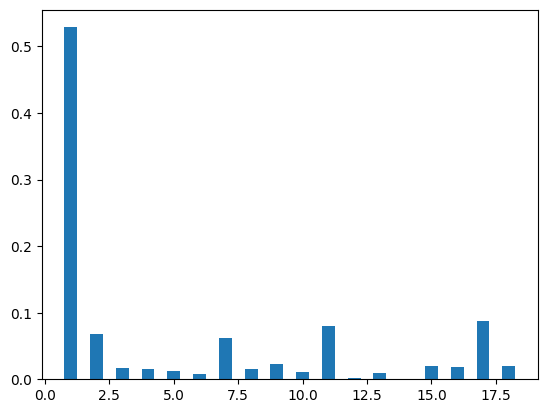

In [74]:
#Gradient Boost Regressor
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'Model score {model.score(X_test, y_test)}')
rmse_te = mean_squared_error(y_test, y_pred_test, squared=False)
print(f'rmse is {rmse_te}')
plt.bar(range(1,len(model.feature_importances_)+1), model.feature_importances_, width=0.5)


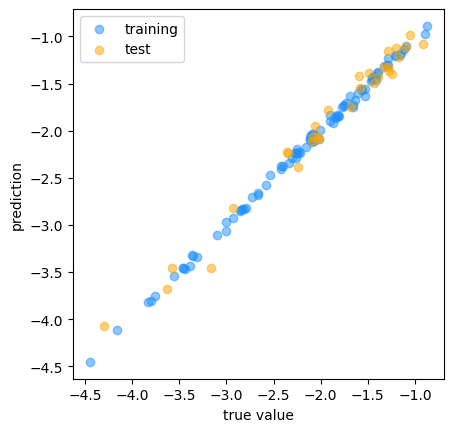

In [95]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train, \
           alpha=0.5, color = 'dodgerblue', label='training')
ax.scatter(y_test, y_pred_test, \
           alpha = 0.5, color ='orange', label='test')
ax.legend()
ax.set_xlabel('true value')
ax.set_ylabel('prediction')
ax.set_aspect('equal')

In [73]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
#shuffling and splitting 100 times and taking y_test as 25 % of data
cvf = ShuffleSplit(n_splits=100, test_size=.25)
scores = cross_val_score(model, X,y,cv=cvf, \
                         scoring='neg_root_mean_squared_error')
print(f'100 times mean RMSE: {-scores.mean():.3f} eV')

100 times mean RMSE: 0.157 eV


In [146]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)    
print(f'Model score is {model_lr.score(X_test,y_test)}') 
rmse_te = mean_squared_error(y_test, y_pred_test_lr, squared=False)
print(f'rmse is {rmse_te}')

Model score is 0.904133053592951
rmse is 0.2589877433218444


In [147]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
#shuffling and splitting 100 times and taking y_test as 25 % of data
cvf = ShuffleSplit(n_splits=100, test_size=.25)
scores = cross_val_score(model_lr, X,y,cv=cvf, \
                         scoring='neg_root_mean_squared_error')
print(f'100 times mean RMSE: {-scores.mean():.3f} eV')

100 times mean RMSE: 0.253 eV


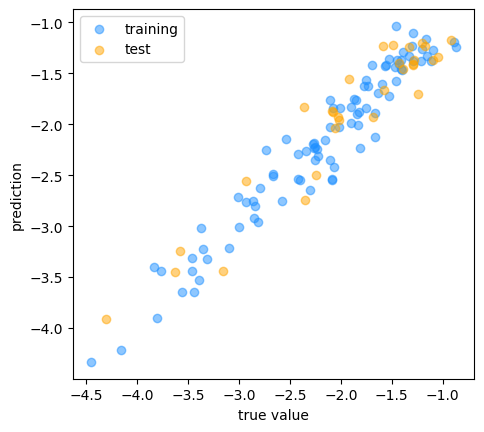

In [148]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train_lr, \
           alpha=0.5, color = 'dodgerblue', label='training')
ax.scatter(y_test, y_pred_test_lr, \
           alpha = 0.5, color ='orange', label='test')
ax.legend()
ax.set_xlabel('true value')
ax.set_ylabel('prediction')
ax.set_aspect('equal')

In [141]:
#polynomial regression - showing -ve score, so dont use this for 2 degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
transformer = PolynomialFeatures(degree=3, include_bias=True)
Xp_tr = transformer.fit_transform(X_train)
print(Xp_tr)
print(f'{Xp_tr.shape}')
model_plr = LinearRegression()
model_plr.fit(Xp_tr, y_train)
#model_plr.fit(X_train, y_train)
y_pred_train_plr = model_plr.predict(Xp_tr)
Xp_te = transformer.fit_transform(X_test)
y_pred_test_plr = model_plr.predict(Xp_te)
print(f'Model score for training data {model_plr.score(Xp_tr, y_train)}')
print(f'Model score {model_plr.score(Xp_te, y_test)}')
#model_plr.score(X_test, y_test)
rmse_te = mean_squared_error(y_test, y_pred_test_plr, squared=False)
print(f'rmse is {rmse_te}')

[[1.00000000e+00 9.00000000e+00 2.62000000e+00 ... 1.02944722e+06
  1.08286875e+05 1.13906250e+04]
 [1.00000000e+00 1.10000000e+01 3.01000000e+00 ... 8.27954944e+05
  3.97315840e+04 1.90662400e+03]
 [1.00000000e+00 1.10000000e+01 3.01000000e+00 ... 6.57910375e+05
  2.13911410e+04 6.95506456e+02]
 ...
 [1.00000000e+00 1.00000000e+01 2.87000000e+00 ... 8.05419880e+04
  2.40628540e+04 7.18905700e+03]
 [1.00000000e+00 1.00000000e+01 2.60000000e+00 ... 2.96919480e+05
  2.26512000e+04 1.72800000e+03]
 [1.00000000e+00 9.00000000e+00 2.62000000e+00 ... 8.05419880e+04
  2.40628540e+04 7.18905700e+03]]
(91, 1330)
Model score for training data 1.0
Model score 0.7841615310365344
rmse is 0.3886057211993337


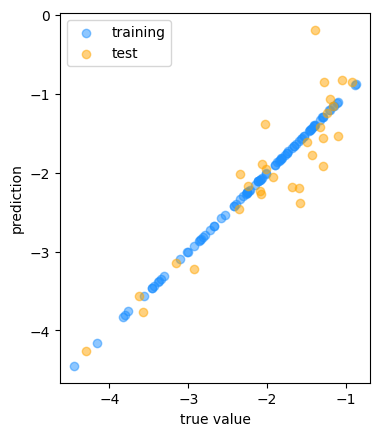

In [138]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train_plr, \
           alpha=0.5, color = 'dodgerblue', label='training')
ax.scatter(y_test, y_pred_test_plr, \
           alpha = 0.5, color ='orange', label='test')
ax.legend()
ax.set_xlabel('true value')
ax.set_ylabel('prediction')
ax.set_aspect('equal')

In [130]:
#Ridge regeression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model_rr = Ridge(alpha=.001) #jab lambda .001 reh raha tab best score aa raha ride regression me
model_rr.fit(X_train, y_train)
y_pred_train_rr = model_rr.predict(X_train)
print(f'Model Score is {model_rr.score(X_test, y_test)}')
y_pred_test_rr = model_rr.predict(X_test)
rmse_te = mean_squared_error(y_test, y_pred_test_rr, squared=False)
print(f'rmse te is {rmse_te}')

Model Score is 0.9010702028755789
rmse te is 0.263092412614391


In [131]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
#shuffling and splitting 100 times and taking y_test as 25 % of data
cvf = ShuffleSplit(n_splits=100, test_size=.25)
scores = cross_val_score(model_rr, X,y,cv=cvf, \
                         scoring='neg_root_mean_squared_error')
print(f'100 times mean RMSE: {-scores.mean():.3f} eV')

100 times mean RMSE: 0.262 eV


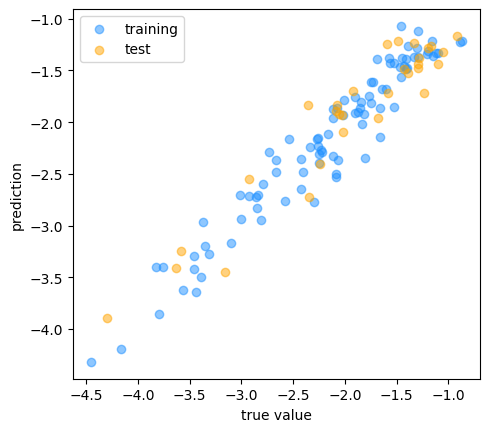

In [133]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train_rr, \
           alpha=0.5, color = 'dodgerblue', label='training')
ax.scatter(y_test, y_pred_test_rr, \
           alpha = 0.5, color ='orange', label='test')
ax.legend()
ax.set_xlabel('true value')
ax.set_ylabel('prediction')
ax.set_aspect('equal')

In [127]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
model_rand_reg = RandomForestRegressor(max_depth=8)
model_rand_reg.fit(X_train, y_train)
y_pred_train_rand = model_rand_reg.predict(X_train)
print(f'Model Score is {model_rand_reg.score(X_test, y_test)}')
y_pred_test_rand = model_rand_reg.predict(X_test)
rmse_te = mean_squared_error(y_test, y_pred_test_rand, squared=False)
print(f'rmse te is {rmse_te}')

Model Score is 0.9614978961679423
rmse te is 0.16412963161950014


In [128]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
#shuffling and splitting 100 times and taking y_test as 25 % of data
cvf = ShuffleSplit(n_splits=100, test_size=.25)
scores = cross_val_score(model_rand_reg, X,y,cv=cvf, \
                         scoring='neg_root_mean_squared_error')
print(f'100 times mean RMSE: {-scores.mean():.3f} eV')

100 times mean RMSE: 0.221 eV


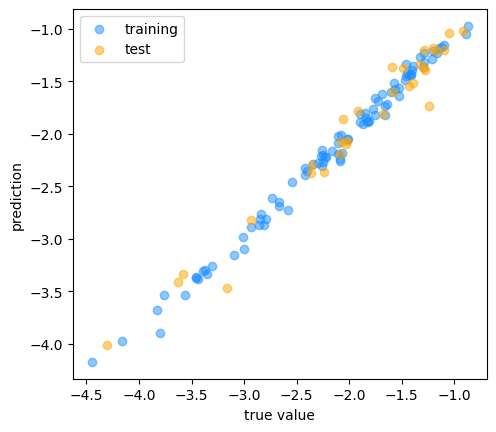

In [129]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train_rand, \
           alpha=0.5, color = 'dodgerblue', label='training')
ax.scatter(y_test, y_pred_test_rand, \
           alpha = 0.5, color ='orange', label='test')
ax.legend()
ax.set_xlabel('true value')
ax.set_ylabel('prediction')
ax.set_aspect('equal')